# Use Iris Dataset and perform PCA on dataset. Examine 1st 2 principal components of X. Cereate a scatter plot with each of 150 rows of X projected onto 1st two principal components. In other words, the horizontal axis should be first principal component and vertical axis should be second priciple component.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iris.csv')
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [4]:
data.shape

(150, 5)

In [7]:
data.describe()


,sepal length,sepal width,petal length,petal width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,2.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
X = data.drop("species",axis=1)
y = data["species"]

X = StandardScaler().fit_transform(X)
X[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [ ]:
covarience = np.cov(X.T)
covarience[:5]

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [ ]:
values, vectors = np.linalg.eig(covarience)

In [ ]:
vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [ ]:
values

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [ ]:
varience = list()
for i in range(len(values)):
  varience.append(values[i]*100/np.sum(values))
varience

[72.9624454132999, 22.85076178670172, 3.6689218892828666, 0.5178709107155016]

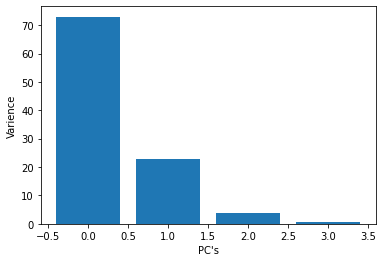

In [ ]:
plt.bar(range(4),varience)
plt.xlabel("PC's")
plt.ylabel("Varience")
plt.show()

In [ ]:
principal_component1=X.dot(vectors.T[0])
principal_component2=X.dot(vectors.T[1])
res = pd.DataFrame(principal_component1,columns=["PC1"])
res["PC2"]= principal_component2
res["Y"]=y 

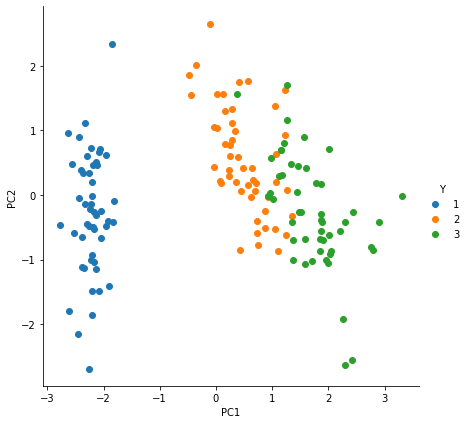

In [ ]:
import seaborn as sns
sns.FacetGrid(res,hue="Y",height=6).map(plt.scatter,'PC1','PC2').add_legend()